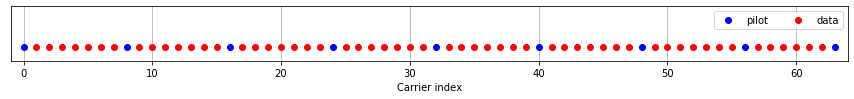

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate

K = 64 # number of OFDM subcarriers
CP = K//4  # length of the cyclic prefix: 25% of the block
P = 8 # number of pilot carriers per OFDM block
pilotValue = 3+3j # The known value each pilot transmits

allCarriers = np.arange(K)  # indices of all subcarriers ([0, 1, ... K-1])
pilotCarriers = allCarriers[::K//P] # Pilots is every (K/P)th carrier.

# For convenience of channel estimation, let's make the last carrier also be a pilot
pilotCarriers = np.hstack([pilotCarriers, np.array([allCarriers[-1]])])
P = P+1

# data carriers are all remaining carriers
dataCarriers = np.delete(allCarriers, pilotCarriers)

plt.figure(figsize=(15, 1))
plt.plot(pilotCarriers, np.zeros_like(pilotCarriers), 'bo', label='pilot')
plt.plot(dataCarriers, np.zeros_like(dataCarriers), 'ro', label='data')
plt.legend(fontsize=10, ncol=2)
plt.xlim((-1,K)); plt.ylim((-0.1, 0.3))
plt.xlabel('Carrier index')
plt.yticks([])
plt.grid(True)
plt.show()

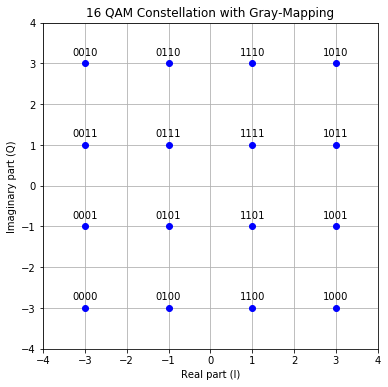

In [10]:
mu = 4 # bits per symbol (i.e. 16QAM)
payloadBits_per_OFDM = len(dataCarriers)*mu  # number of payload bits per OFDM symbol

mapping_table = {
    (0,0,0,0) : -3-3j,
    (0,0,0,1) : -3-1j,
    (0,0,1,0) : -3+3j,
    (0,0,1,1) : -3+1j,
    (0,1,0,0) : -1-3j,
    (0,1,0,1) : -1-1j,
    (0,1,1,0) : -1+3j,
    (0,1,1,1) : -1+1j,
    (1,0,0,0) :  3-3j,
    (1,0,0,1) :  3-1j,
    (1,0,1,0) :  3+3j,
    (1,0,1,1) :  3+1j,
    (1,1,0,0) :  1-3j,
    (1,1,0,1) :  1-1j,
    (1,1,1,0) :  1+3j,
    (1,1,1,1) :  1+1j
}

plt.figure(figsize=(6, 6))
plt.xlim((-4, 4)); plt.ylim((-4, 4))
plt.xlabel('Real part (I)')
plt.ylabel('Imaginary part (Q)')
plt.title('16 QAM Constellation with Gray-Mapping')

for b3 in [0, 1]:
    for b2 in [0, 1]:
        for b1 in [0, 1]:
            for b0 in [0, 1]:
                B = (b3, b2, b1, b0)
                Q = mapping_table[B]
                plt.grid(True)
                plt.plot(Q.real, Q.imag, 'bo')
                plt.text(Q.real, Q.imag+0.2, "".join(str(x) for x in B), ha='center')

In [11]:
mapping_table = {
    (0,0,0,0,0,0) :  3 + 3j,
    (0,0,0,0,0,1) :  3 + 1j,
    (0,0,0,0,1,0) :  1 + 3j,
    (0,0,0,0,1,1) :  1 + 1j,
    (0,0,0,1,0,0) :  3 + 5j,
    (0,0,0,1,0,1) :  3 + 7j,
    (0,0,0,1,1,0) :  1 + 5j,
    (0,0,0,1,1,1) :  1 + 7j,
    (0,0,1,0,0,0) :  5 + 3j,
    (0,0,1,0,0,1) :  5 + 1j,
    (0,0,1,0,1,0) :  7 + 3j,
    (0,0,1,0,1,1) :  7 + 1j,
    (0,0,1,1,0,0) :  5 + 5j,
    (0,0,1,1,0,1) :  5 + 7j,
    (0,0,1,1,1,0) :  7 + 5j,
    (0,0,1,1,1,1) :  7 + 7j,
    (0,1,0,0,0,0) :  3 - 3j,
    (0,1,0,0,0,1) :  3 - 1j,
    (0,1,0,0,1,0) :  1 - 3j,
    (0,1,0,0,1,1) :  1 - 1j,
    (0,1,0,1,0,0) :  3 - 5j,
    (0,1,0,1,0,1) :  3 - 7j,
    (0,1,0,1,1,0) :  1 - 5j,
    (0,1,0,1,1,1) :  1 - 7j,
    (0,1,1,0,0,0) :  5 - 3j,
    (0,1,1,0,0,1) :  5 - 1j,
    (0,1,1,0,1,0) :  7 - 3j,
    (0,1,1,0,1,1) :  7 - 1j,
    (0,1,1,1,0,0) :  5 - 5j,
    (0,1,1,1,0,1) :  5 - 7j,
    (0,1,1,1,1,0) :  7 - 5j,
    (0,1,1,1,1,1) :  7 - 7j, 
    
    (1,0,0,0,0,0) :  -3 + 3j,
    (1,0,0,0,0,1) :  -3 + 1j,
    (1,0,0,0,1,0) :  -1 + 3j,
    (1,0,0,0,1,1) :  -1 + 1j,
    (1,0,0,1,0,0) :  -3 + 5j,
    (1,0,0,1,0,1) :  -3 + 7j,
    (1,0,0,1,1,0) :  -1 + 5j,
    (1,0,0,1,1,1) :  -1 + 7j,
    (1,0,1,0,0,0) :  -5 + 3j,
    (1,0,1,0,0,1) :  -5 + 1j,
    (1,0,1,0,1,0) :  -7 + 3j,
    (1,0,1,0,1,1) :  -7 + 1j,
    (1,0,1,1,0,0) :  -5 + 5j,
    (1,0,1,1,0,1) :  -5 + 7j,
    (1,0,1,1,1,0) :  -7 + 5j,
    (1,0,1,1,1,1) :  -7 + 7j,
    (1,1,0,0,0,0) :  -3 - 3j,
    (1,1,0,0,0,1) :  -3 - 1j,
    (1,1,0,0,1,0) :  -1 - 3j,
    (1,1,0,0,1,1) :  -1 - 1j,
    (1,1,0,1,0,0) :  -3 - 5j,
    (1,1,0,1,0,1) :  -3 - 7j,
    (1,1,0,1,1,0) :  -1 - 5j,
    (1,1,0,1,1,1) :  -1 - 7j,
    (1,1,1,0,0,0) :  -5 - 3j,
    (1,1,1,0,0,1) :  -5 - 1j,
    (1,1,1,0,1,0) :  -7 - 3j,
    (1,1,1,0,1,1) :  -7 - 1j,
    (1,1,1,1,0,0) :  -5 - 5j,
    (1,1,1,1,0,1) :  -5 - 7j,
    (1,1,1,1,1,0) :  -7 - 5j,
    (1,1,1,1,1,1) :  -7 - 7j   
}

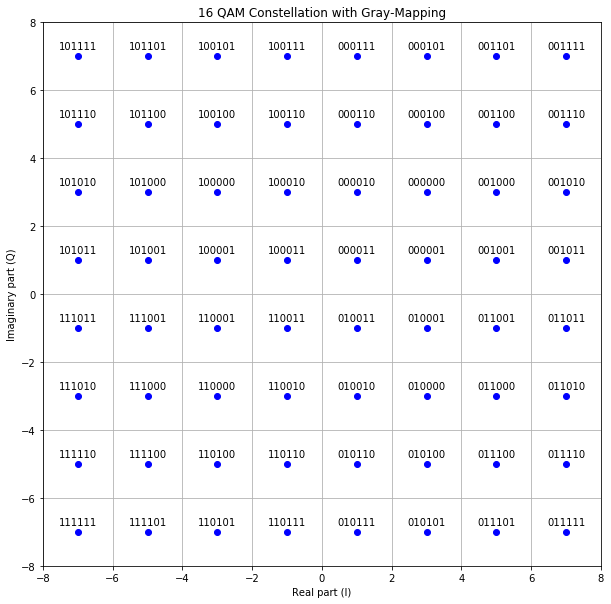

In [12]:
mu = 4 # bits per symbol (i.e. 16QAM)
payloadBits_per_OFDM = len(dataCarriers)*mu  # number of payload bits per OFDM symbol

mapping_table = {
    (0,0,0,0,0,0) :  3 + 3j,
    (0,0,0,0,0,1) :  3 + 1j,
    (0,0,0,0,1,0) :  1 + 3j,
    (0,0,0,0,1,1) :  1 + 1j,
    (0,0,0,1,0,0) :  3 + 5j,
    (0,0,0,1,0,1) :  3 + 7j,
    (0,0,0,1,1,0) :  1 + 5j,
    (0,0,0,1,1,1) :  1 + 7j,
    (0,0,1,0,0,0) :  5 + 3j,
    (0,0,1,0,0,1) :  5 + 1j,
    (0,0,1,0,1,0) :  7 + 3j,
    (0,0,1,0,1,1) :  7 + 1j,
    (0,0,1,1,0,0) :  5 + 5j,
    (0,0,1,1,0,1) :  5 + 7j,
    (0,0,1,1,1,0) :  7 + 5j,
    (0,0,1,1,1,1) :  7 + 7j,
    (0,1,0,0,0,0) :  3 - 3j,
    (0,1,0,0,0,1) :  3 - 1j,
    (0,1,0,0,1,0) :  1 - 3j,
    (0,1,0,0,1,1) :  1 - 1j,
    (0,1,0,1,0,0) :  3 - 5j,
    (0,1,0,1,0,1) :  3 - 7j,
    (0,1,0,1,1,0) :  1 - 5j,
    (0,1,0,1,1,1) :  1 - 7j,
    (0,1,1,0,0,0) :  5 - 3j,
    (0,1,1,0,0,1) :  5 - 1j,
    (0,1,1,0,1,0) :  7 - 3j,
    (0,1,1,0,1,1) :  7 - 1j,
    (0,1,1,1,0,0) :  5 - 5j,
    (0,1,1,1,0,1) :  5 - 7j,
    (0,1,1,1,1,0) :  7 - 5j,
    (0,1,1,1,1,1) :  7 - 7j, 
    
    (1,0,0,0,0,0) :  -3 + 3j,
    (1,0,0,0,0,1) :  -3 + 1j,
    (1,0,0,0,1,0) :  -1 + 3j,
    (1,0,0,0,1,1) :  -1 + 1j,
    (1,0,0,1,0,0) :  -3 + 5j,
    (1,0,0,1,0,1) :  -3 + 7j,
    (1,0,0,1,1,0) :  -1 + 5j,
    (1,0,0,1,1,1) :  -1 + 7j,
    (1,0,1,0,0,0) :  -5 + 3j,
    (1,0,1,0,0,1) :  -5 + 1j,
    (1,0,1,0,1,0) :  -7 + 3j,
    (1,0,1,0,1,1) :  -7 + 1j,
    (1,0,1,1,0,0) :  -5 + 5j,
    (1,0,1,1,0,1) :  -5 + 7j,
    (1,0,1,1,1,0) :  -7 + 5j,
    (1,0,1,1,1,1) :  -7 + 7j,
    (1,1,0,0,0,0) :  -3 - 3j,
    (1,1,0,0,0,1) :  -3 - 1j,
    (1,1,0,0,1,0) :  -1 - 3j,
    (1,1,0,0,1,1) :  -1 - 1j,
    (1,1,0,1,0,0) :  -3 - 5j,
    (1,1,0,1,0,1) :  -3 - 7j,
    (1,1,0,1,1,0) :  -1 - 5j,
    (1,1,0,1,1,1) :  -1 - 7j,
    (1,1,1,0,0,0) :  -5 - 3j,
    (1,1,1,0,0,1) :  -5 - 1j,
    (1,1,1,0,1,0) :  -7 - 3j,
    (1,1,1,0,1,1) :  -7 - 1j,
    (1,1,1,1,0,0) :  -5 - 5j,
    (1,1,1,1,0,1) :  -5 - 7j,
    (1,1,1,1,1,0) :  -7 - 5j,
    (1,1,1,1,1,1) :  -7 - 7j   
}

plt.figure(figsize=(10, 10))
plt.xlim((-8, 8)); plt.ylim((-8, 8))
plt.yscale('linear')
plt.xlabel('Real part (I)')
plt.ylabel('Imaginary part (Q)')
plt.title('16 QAM Constellation with Gray-Mapping')

for b5 in [0, 1]:
    for b4 in [0, 1]:
        for b3 in [0, 1]:
            for b2 in [0, 1]:
                for b1 in [0, 1]:
                    for b0 in [0, 1]:
                        B = (b5, b4 ,b3, b2, b1, b0)
                        Q = mapping_table[B]
                        plt.grid(True)
                        plt.plot(Q.real, Q.imag, 'bo')
                        plt.text(Q.real, Q.imag+0.2, "".join(str(x) for x in B), ha='center')

all_subcarriers: [-114 -113 -112 -111 -110 -109 -108 -107 -106 -105 -104 -103 -102 -101
 -100  -99  -98  -97  -96  -95  -94  -93  -92  -91  -90  -89  -88  -87
  -86  -85  -84  -83  -82  -81  -80  -79  -78  -77  -76  -75  -74  -73
  -72  -71  -70  -69  -68  -67  -66  -65  -64  -63  -62  -61  -60  -59
  -58  -57  -56  -55  -54  -53  -52  -51  -50  -49  -48  -47  -46  -45
  -44  -43  -42  -41  -40  -39  -38  -37  -36  -35  -34  -33  -32  -31
  -30  -29  -28  -27  -26  -25  -24  -23  -22  -21  -20  -19  -18  -17
  -16  -15  -14  -13  -12  -11  -10   -9   -8   -7   -6   -5   -4   -3
   -2   -1    0    1    2    3    4    5    6    7    8    9   10   11
   12   13   14   15   16   17   18   19   20   21   22   23   24   25
   26   27   28   29   30   31   32   33   34   35   36   37   38   39
   40   41   42   43   44   45   46   47   48   49   50   51   52   53
   54   55   56   57   58   59   60   61   62   63   64   65   66   67
   68   69   70   71   72   73   74   75   76   77   78   79

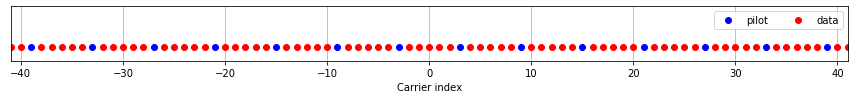

In [34]:
import numpy as np
import matplotlib.pyplot as plt

number_of_subcarriers = 229 # 229 // 6
scale = 6 # scale for decrease number of view subcarriers for plot

half_subcarriers = (number_of_subcarriers-1) // 2
view_plot_subcarriers = ((half_subcarriers * 2) // scale) + 1

cycle_prefix = number_of_subcarriers // 4   # 25% of the OFDM block
pilot_value = np.array([1, 1, 1, -1, -1, -1, 1, -1, -1, 1, -1], int)

all_subcarriers = np.arange(-half_subcarriers, half_subcarriers+1)
pilot_subcarriers = all_subcarriers[3::6]

del_range = np.arange(3, (half_subcarriers * 2), 6)

data_subcarriers = np.delete(all_subcarriers, del_range)

print("all_subcarriers: %s" % all_subcarriers)
print("pilot_subcarriers: %s" % pilot_subcarriers)
print("data_subcarriers: %s" % data_subcarriers)

plt.figure(figsize=(15, 1))
plt.plot(pilot_subcarriers, np.zeros_like(pilot_subcarriers), 'bo', label = 'pilot')
plt.plot(data_subcarriers, np.zeros_like(data_subcarriers), 'ro', label = 'data')

plt.legend(fontsize=10, ncol=2)
plt.xlim((-view_plot_subcarriers-2, view_plot_subcarriers+2)); plt.ylim((-0.1, 0.3))
plt.xlabel('Carrier index')
plt.yticks([])
plt.grid(True)
plt.show()

all_subcarriers: [-114 -113 -112 -111 -110 -109 -108 -107 -106 -105 -104 -103 -102 -101
 -100  -99  -98  -97  -96  -95  -94  -93  -92  -91  -90  -89  -88  -87
  -86  -85  -84  -83  -82  -81  -80  -79  -78  -77  -76  -75  -74  -73
  -72  -71  -70  -69  -68  -67  -66  -65  -64  -63  -62  -61  -60  -59
  -58  -57  -56  -55  -54  -53  -52  -51  -50  -49  -48  -47  -46  -45
  -44  -43  -42  -41  -40  -39  -38  -37  -36  -35  -34  -33  -32  -31
  -30  -29  -28  -27  -26  -25  -24  -23  -22  -21  -20  -19  -18  -17
  -16  -15  -14  -13  -12  -11  -10   -9   -8   -7   -6   -5   -4   -3
   -2   -1    0    1    2    3    4    5    6    7    8    9   10   11
   12   13   14   15   16   17   18   19   20   21   22   23   24   25
   26   27   28   29   30   31   32   33   34   35   36   37   38   39
   40   41   42   43   44   45   46   47   48   49   50   51   52   53
   54   55   56   57   58   59   60   61   62   63   64   65   66   67
   68   69   70   71   72   73   74   75   76   77   78   79

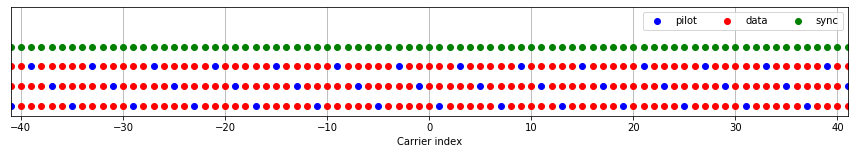

In [62]:
import numpy as np
import matplotlib.pyplot as plt

number_of_subcarriers = 229 # 229 // 6
scale = 6 # scale for decrease number of view subcarriers for plot

half_subcarriers = (number_of_subcarriers-1) // 2
view_plot_subcarriers = ((half_subcarriers * 2) // scale) + 1

cycle_prefix = number_of_subcarriers // 4   # 25% of the OFDM block
pilot_value = np.array([1, 1, 1, -1, -1, -1, 1, -1, -1, 1, -1], int)

all_subcarriers = np.arange(-half_subcarriers, half_subcarriers+1)

# First block OFDM
pilot_subcarriers = all_subcarriers[3::6]
del_range = np.arange(3, (half_subcarriers * 2), 6)
data_subcarriers = np.delete(all_subcarriers, del_range)

print("all_subcarriers: %s" % all_subcarriers, end='\n\n')
print("pilot_subcarriers: %s" % pilot_subcarriers)
print("data_subcarriers: %s" % data_subcarriers, end='\n\n')

plt.figure(figsize=(15, 2))
plt.plot(pilot_subcarriers, np.zeros_like(pilot_subcarriers)+4, 'bo', label = 'pilot')
plt.plot(data_subcarriers, np.zeros_like(data_subcarriers)+4, 'ro', label = 'data')

# Second block OFDM
pilot_subcarriers_2 = all_subcarriers[5::6]
del_range_2 = np.arange(5, (half_subcarriers * 2), 6)
data_subcarriers_2 = np.delete(all_subcarriers, del_range_2)

print("pilot_subcarriers_2: %s" % pilot_subcarriers_2)
print("data_subcarriers_2: %s" % data_subcarriers_2, end='\n\n')

plt.plot(pilot_subcarriers_2, np.zeros_like(pilot_subcarriers_2)+2, 'bo')
plt.plot(data_subcarriers_2, np.zeros_like(data_subcarriers_2)+2, 'ro')

# Third block OFDM
pilot_subcarriers_3 = all_subcarriers[1::6]
del_range_3 = np.arange(1, (half_subcarriers * 2), 6)
data_subcarriers_3 = np.delete(all_subcarriers, del_range_3)

print("pilot_subcarriers_3: %s" % pilot_subcarriers_3)
print("data_subcarriers_3: %s" % data_subcarriers_3, end='\n\n')

plt.plot(pilot_subcarriers_3, np.zeros_like(pilot_subcarriers_3), 'bo')
plt.plot(data_subcarriers_3, np.zeros_like(data_subcarriers_3), 'ro')

plt.plot(all_subcarriers, np.zeros_like(all_subcarriers)+6, 'go', label = 'sync')

plt.legend(fontsize=10, ncol=3)
plt.xlim((-view_plot_subcarriers-2, view_plot_subcarriers+2)); plt.ylim((-1, 10))
plt.xlabel('Carrier index')
plt.yticks([])
plt.grid(True)
plt.show()

In [72]:
pilot_value = np.array([-1, 1, -1, 1, -1, 1, 1, 1, -1, 1, 1, 1, 1, -1, -1, -1, 1, 1, -1, -1, -1, 1, 1, 0])

print(np.reshape(pilot_value, (len(pilot_value)//6, 6)))

[[-1  1 -1  1 -1  1]
 [ 1  1 -1  1  1  1]
 [ 1 -1 -1 -1  1  1]
 [-1 -1 -1  1  1  0]]
